Example from https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py

- Trains a simple convnet on the MNIST dataset.
- Gets to 99.25% test accuracy after 12 epochs
 (there is still a lot of margin for parameter tuning).
- 16 seconds per epoch on a GRID K520 GPU.

In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using Theano backend.


In [3]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


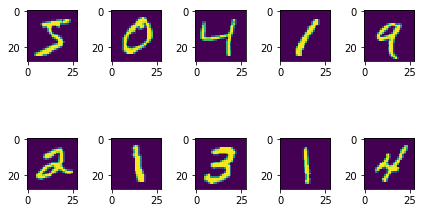

In [4]:
fig, ax = plt.subplots(2, 5)
for i, a in enumerate(ax.flatten()):
    a.imshow(x_train[i])
fig.tight_layout()

In [5]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [7]:
# convert class vectors to binary class matrices
print(y_test.shape)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_test.shape)

(10000,)
(10000, 10)


In [8]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [9]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [11]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 218s - loss: 0.0436 - acc: 0.9869 - val_loss: 0.0279 - val_acc: 0.9904
Epoch 2/12
60000/60000 [==============================] - 162s - loss: 0.0404 - acc: 0.9878 - val_loss: 0.0279 - val_acc: 0.9907
Epoch 3/12
60000/60000 [==============================] - 162s - loss: 0.0386 - acc: 0.9879 - val_loss: 0.0285 - val_acc: 0.9898
Epoch 4/12
60000/60000 [==============================] - 162s - loss: 0.0361 - acc: 0.9891 - val_loss: 0.0256 - val_acc: 0.9909
Epoch 5/12
60000/60000 [==============================] - 158s - loss: 0.0346 - acc: 0.9894 - val_loss: 0.0258 - val_acc: 0.9910
Epoch 6/12
60000/60000 [==============================] - 156s - loss: 0.0324 - acc: 0.9904 - val_loss: 0.0275 - val_acc: 0.9907
Epoch 7/12
60000/60000 [==============================] - 155s - loss: 0.0324 - acc: 0.9902 - val_loss: 0.0256 - val_acc: 0.9911
Epoch 8/12
60000/60000 [=======================

In [13]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0252210091153
Test accuracy: 0.9923


In [18]:
pred = model.predict_classes(x_test)
print('\n', pred[:10])

 9952/10000 [============================>.] - ETA: 0s
 [7 2 1 0 4 1 4 9 5 9]


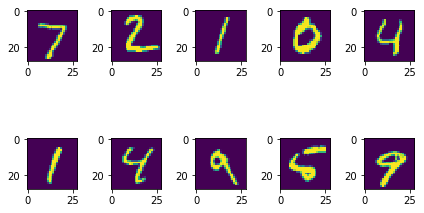

In [20]:
fig, ax = plt.subplots(2, 5)
for i, a in enumerate(ax.flatten()):
    a.imshow(x_test[i].reshape((28, 28)))
fig.tight_layout()

In [21]:
# Reload the data to compare predictions vs. actual on test data:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(np.mean(pred != y_test))
inds = np.where(pred != y_test)[0]
print(inds, '\n', pred[inds], '\n', y_test[inds])

0.0077
[ 321  340  445  582  674  740  947 1014 1039 1182 1226 1232 1242 1260 1319
 1393 1414 1530 1709 1790 1878 1901 2018 2035 2043 2118 2130 2135 2293 2454
 2597 2654 2896 2921 2939 3030 3060 3073 3289 3422 3503 3520 3534 3558 3726
 3727 3808 3941 4176 4238 4248 4360 4571 4639 4731 4740 4761 4860 5887 5937
 5955 6091 6555 6558 6597 6625 6651 6783 8273 8527 9009 9015 9664 9729 9792
 9839 9982] 
 [7 3 0 2 3 9 9 5 3 5 2 4 9 1 0 3 7 7 5 7 3 4 7 3 8 0 9 1 0 5 3 1 0 2 5 0 7
 2 9 0 1 4 8 0 9 9 8 6 7 3 1 3 8 9 7 5 8 9 0 3 8 5 9 3 9 2 8 6 9 9 2 2 7 6
 9 7 6] 
 [2 5 6 8 5 4 8 6 7 6 7 9 4 7 8 5 9 8 9 2 8 9 1 5 4 6 4 6 9 6 5 6 8 3 9 6 9
 1 8 6 9 6 4 5 4 8 7 4 2 7 2 5 6 8 8 3 9 4 7 5 3 9 8 6 0 8 0 1 0 4 7 7 2 5
 4 2 5]


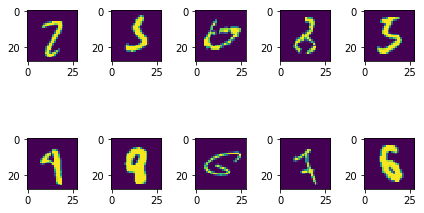

In [22]:
fig, ax = plt.subplots(2, 5)
for i, a in enumerate(ax.flatten()):
    a.imshow(x_test[inds[i]])
fig.tight_layout()